In [1]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cartopy.io.img_tiles as cimgt

In [2]:
from db_routes import load_routes_from_db

routes = load_routes_from_db()

In [3]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12, 17),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [4]:
def bounds(rts):
    return (
        min(rt.bounds[0] for rt in rts.values()),
        min(rt.bounds[1] for rt in rts.values()),
        max(rt.bounds[2] for rt in rts.values()),
        max(rt.bounds[3] for rt in rts.values()),
        )

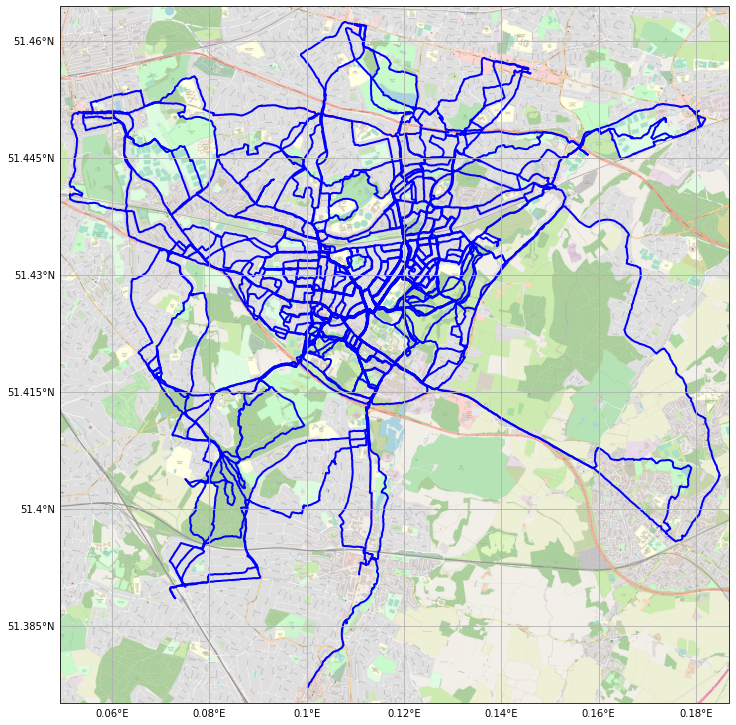

In [5]:
image_factory = cimgt.OSM()  # Open Street Map

pad_lat = 0.002
pad_lon = 0.002

lon_min, lat_min, lon_max, lat_max = bounds(routes)
extent = [lon_min - pad_lon, lon_max + pad_lon, lat_min - pad_lat, lat_max + pad_lat]

fig, ax = make_map(projection=image_factory.crs)
ax.set_extent(extent)

# the second argument in that add_image() call is passed to the image_factory and is the "target_z".
# see https://github.com/SciTools/cartopy/blob/master/lib/cartopy/io/img_tiles.py
# OSM() inherits from GoogleWTS, which holds the image_for_domain() method, which is where
# the 14 gets used.
# target_z seems to be more "zoom" than (what I thought at first) "z-order"
# 1-3, 5: no map
# 4: some kind of blocks, quite large
# 6: smaller blocks, noobvious pattern
# 7: similar to 6, some green appearing
# 12 seems to include a lot of place names, 13 has the names much smaller, while 14 makes then tiny
img = ax.add_image(image_factory, 16)  

def random_color():
    return (0.5 * np.random.random_sample() + 0.25,
            0.5 * np.random.random_sample() + 0.25,
            0.5 * np.random.random_sample() + 0.25,)

for route in routes.values():
    s = ax.add_geometries(route.shape, ccrs.PlateCarree(),
                        facecolor='none',
                        edgecolor='blue', #(random_color()),
                        linewidth=2)